# quantifying dependence of annihilation rate on attraction strength
Tim Tyree<br>
6.6.2023

In [1]:
from lib.my_initialization import *

import subprocess

plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


# define module

In [2]:
# @njit
def compute_annihilation_rates_lpm(D,alinear,r,kappa,N0_lst,L,nb_dir,dt=1e-4,niter=500,neighbor=0,force_code=2,seed=0,**kwargs):
    """
    Example Usage:
df_rates = compute_annihilation_rates_lpm(D,alinear,r,kappa,N0_lst,L,nb_dir)#,dt=1e-4,niter=500,neighbor=0,force_code=2,seed=0,**kwargs)
    """

    task_lst=[]
    # for N0 in range(2,100,2):
    for N0 in N0_lst:
        input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} {force_code}"
        call_string = f"{nb_dir}/../c/attractive/return_CollTime.x <<< '{input_string}'"
        call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    #     call_string = f'/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x < "{input_string}"'
    #     call_string+= '| grep "Tavg=" | grep -Eo "[+-]?[0-9]+([.][0-9]+)?"'
        task_lst.append(call_string)
#     print(f"{len(task_lst)=}")
    call_string
    def subroutine(call_string):
        p=subprocess.Popen(call_string,stdout=subprocess.PIPE,shell=True)
        return eval(p.communicate()[0])
#         return eval(subprocess.Popen(call_string,stdout=subprocess.PIPE,shell=True))
#         return eval(subprocess.check_output(call_string, shell=True))
    retval=[]
    for call_string in task_lst:
        retval.append(subroutine(call_string))
#     len(retval)
    A=L**2
    q_lst=[]
    w_lst=[]
    Tavg_lst=[]
    for N0,Tavg in zip(N0_lst,retval):
        rate = 1/Tavg
        w = rate/A
    #     q = (N0+2)/A
        q = N0/A
        #record
        w_lst.append(w)
        q_lst.append(q)
        Tavg_lst.append(Tavg)
    df_rates = pd.DataFrame(dict(
        N0=N0_lst,
        Tavg=Tavg_lst,
        q=q_lst,
        w=w_lst))
    return df_rates

In [3]:
import multiprocess
def eval_routine_multiprocess(routine, task_lst, ncores):
    p = multiprocess.Pool(ncores)
    return p.map(routine, task_lst)
    

In [4]:
# N0=100;seed=0;force_code=2
# input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} {force_code}"
# call_string = f"{nb_dir}/../c/attractive/return_CollTime.x <<< '{input_string}'"
# call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
# # subprocess.Popen(call_string)
# p=subprocess.Popen(call_string,stdout=subprocess.PIPE,shell=True)
# eval(p.communicate()[0])

In [5]:
# dist_pbc?

# consistency check from return_CollTime.c

with files generated as in http://localhost:8890/notebooks/consistency%20checks%20for%20lpm%20annihilation%20simulation.ipynb

In [6]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [7]:
!pwd

/Users/timothytyree/Documents/GitHub/bgmc/c/attractive


In [8]:
#compile the executable
#estimated run time ~ 45 seconds
os.system('./gcc.sh')

0

In [9]:
N0_lst=list(range(2,102,2))

In [10]:
L=5
# L=10
# rate_dir_fk = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_fk_L_{L}.csv'
# rate_dir_lr = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_lr_L_{L}.csv'
rate_dir_fk = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_fk_L_{L}_dt_1e-6.csv'
rate_dir_lr = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_lr_L_{L}_dt_1e-6.csv'
df_rates_fk=pd.read_csv(rate_dir_fk)
df_rates_lr=pd.read_csv(rate_dir_lr)

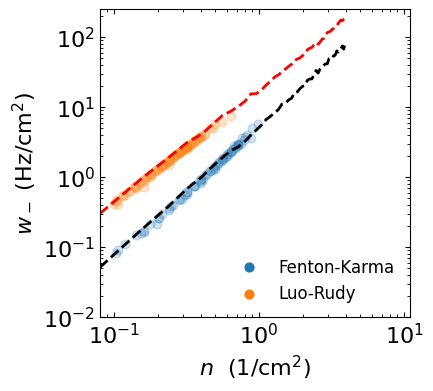

In [11]:
use_filterby_minN=True
minN=10
figsize = (4, 4) 
fontsize=16
x1lim=[0.08, 11]
x2lim=[0.01, 250]
fig, ax = plt.subplots(figsize=figsize)
#plot the lpm
df_rates_fk.plot(x='q',y='w',c='k',lw=2,ax=ax,label='_',style='--')
df_rates_lr.plot(x='q',y='w',c='r',lw=2,ax=ax,label='_LPM',style='--')

#format_plot
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize-4,x1lim=x1lim, x2lim=x2lim)
format_plot(ax=ax,xlabel=r'$n$  (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize)
# ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.show()

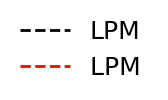

True

In [13]:
label_lst=["LPM", "LPM "]
color_lst=['k', 'r']
kwargs_legend={
    'frameon':False,
    'loc':'center',
    'ncol':1,
    'fontsize':18}
PlotLegend_lines(label_lst=label_lst,color_lst=color_lst,figsize=(1,1),**kwargs_legend)

In [14]:
PlotLegend_lines

<function lib.viewer.bluf.LegendPlot.PlotLegend_lines(label_lst=['Random Guess', '5X Random Guess'], color_lst=['r', 'k'], linestyle='dashed', lw=2, figsize=(1, 1), **kwargs)>

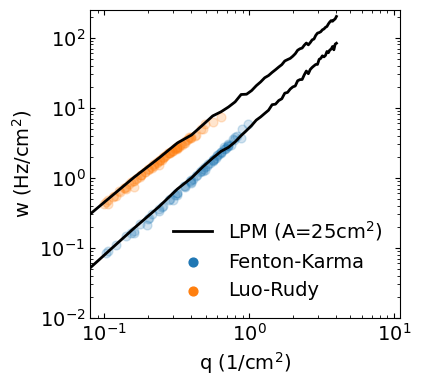

In [15]:
use_filterby_minN=True
minN=10
figsize = (4, 4) 
# fontsize=16
fontsize=14
x1lim=[0.08, 11]
x2lim=[0.01, 250]
fig, ax = plt.subplots(figsize=figsize)
#plot the lpm
df_rates_fk.plot(x='q',y='w',c='k',lw=2,ax=ax,label='_')
df_rates_lr.plot(x='q',y='w',c='k',lw=2,ax=ax,label=f'LPM (A={L**2}cm'+r'$^2$)')

#format_plot
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)
# ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.show()

In [16]:
L=5
L=10
rate_dir_fk = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_fk_L_{L}.csv'
rate_dir_lr = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_lr_L_{L}.csv'
# rate_dir_fk = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_fk_L_{L}_dt_1e-6.csv'
# rate_dir_lr = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_lr_L_{L}_dt_1e-6.csv'
df_rates_fk=pd.read_csv(rate_dir_fk)
df_rates_lr=pd.read_csv(rate_dir_lr)

In [17]:
print(f"annihilation rate density powerlaw fits ({L=}):")
xmin=0.#/cm^2
# xmin=6#/cm^2
#TODO: filter by xmin
boo = df_rates_fk['q'].values>xmin
boo2 = df_rates_lr['q'].values>xmin
dict_fit_death_fk_lpm = print_fit_power_law(x=df_rates_fk[boo]['q'].values,y=df_rates_fk[boo]['w'].values)
dict_fit_death_lr_lpm = print_fit_power_law(x=df_rates_lr[boo2]['q'].values,y=df_rates_lr[boo2]['w'].values)
# dict_fit_death_fk_lpm = print_fit_power_law(x=df_rates_fk['q'].values,y=df_rates_fk['w'].values)
# dict_fit_death_lr_lpm = print_fit_power_law(x=df_rates_lr['q'].values,y=df_rates_lr['w'].values)

annihilation rate density powerlaw fits (L=10):
m = 1.834650 +/- 0.015369
M = 4.753692 +/- 0.168808 Hz/cm^2; B=2.338969 +/- 0.027770
RMSE=0.0808 Hz/cm^2; R^2=0.9991; MPE=3.6940%; N=50
m = 1.611116 +/- 0.017261
M = 12.594137 +/- 0.637652 Hz/cm^2; B=4.817937 +/- 0.066285
RMSE=0.2460 Hz/cm^2; R^2=0.9986; MPE=4.1519%; N=50


In [18]:
# L=5
# # L=10
# rate_dir_fk = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_fk_L_{L}.csv'
# rate_dir_lr = f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_c_lr_L_{L}.csv'
# df_rates_fk=pd.read_csv(rate_dir_fk)
# df_rates_lr=pd.read_csv(rate_dir_lr)

In [19]:
x = df_rates_fk['q'].values
y = df_rates_fk['w'].values
yhat = dict_fit_death_fk_lpm['M'] * x ** dict_fit_death_fk_lpm['m']
print(f"FK: ")
pe=np.abs(y-yhat)/y
print(f"Mean % Disagreement: {np.mean(pe):.3%}")
print(f"Max % Disagreement: {np.max(pe):.3%}")

x = df_rates_lr['q'].values
y = df_rates_lr['w'].values
yhat = dict_fit_death_lr_lpm['M'] * x ** dict_fit_death_lr_lpm['m']
print(f"LR: ")
pe=np.abs(y-yhat)/y
print(f"Mean % Disagreement: {np.mean(pe):.3%}")
print(f"Max % Disagreement: {np.max(pe):.3%}")

FK: 
Mean % Disagreement: 3.790%
Max % Disagreement: 13.528%
LR: 
Mean % Disagreement: 4.101%
Max % Disagreement: 17.900%


In [20]:
x = df_rates_fk['q'].values
y = df_rates_fk['w'].values
yhat = dict_fit_death_fk_lpm['M'] * x ** dict_fit_death_fk_lpm['m']
print(f"FK: ")
rmse=np.sqrt(np.mean((y-yhat)**2))
print(f"RMSE: {np.max(rmse):.3f} Hz/cm^2")

x = df_rates_lr['q'].values
y = df_rates_lr['w'].values
yhat = dict_fit_death_lr_lpm['M'] * x ** dict_fit_death_lr_lpm['m']
print(f"LR: ")
rmse=np.sqrt(np.mean((y-yhat)**2))
print(f"RMSE: {np.max(rmse):.3f} Hz/cm^2")

FK: 
RMSE: 0.081 Hz/cm^2
LR: 
RMSE: 0.246 Hz/cm^2


In [21]:
# plt.plot(x,y)
# plt.plot(x,yhat)
# plt.xscale('log')
# plt.yscale('log')

# compute the dependence of the annihilation rates on attraction strength

In [66]:
alinear_lst=[
    1.5520, #1.781 - 2*0.115, #0.1145,
    9.3,
    ###the varkappa sweep####
    1,2,3,4,5,
    6,7,8,9, # <--- optional bc otherwise I had <60 jobs...
    10,15,20,25,30,
#     40,50,60,70,80,90,100, # <--- optional bc otherwise I had <60 jobs...
]

In [61]:
#test it works normally in serial
# df_rates = compute_annihilation_rates_lpm(D,alinear,r,kappa,N0_lst,L,nb_dir)#,dt=1e-4,niter=500,neighbor=0,force_code=2,seed=0,**kwargs)

In [82]:
#launch subprocess in parallel for each alinear in alinear_lst
def routine(task):
    D,alinear,r,kappa,N0_lst,L,nb_dir = task
    df_rates = compute_annihilation_rates_lpm(D,alinear,r,kappa,N0_lst,L,nb_dir,dt=1e-4)#,niter=500,neighbor=0,force_code=2,seed=0,**kwargs)
    return df_rates

In [93]:
print("Number of cpu : ", os.cpu_count())
ncores=6

Number of cpu :  8


In [94]:
# niter=1000
# niter=500
# niter=200
# dt=1e-4
# dt=1e-5
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
# neighbor=0
# r=0.155;kappa=300  #table 1
# r=0.3;kappa=60 #not bad
# r=0.33;kappa=70 #noice at L=5. meh at L=10
r=0.314;kappa=75 #<<<< new table 1
# kappa=100; r=0.125 #wrong exponent
# seed=1
# seed=0

In [95]:
task_lst=[]
for alinear in alinear_lst:
    task_lst.append((D,alinear,r,kappa,N0_lst,L,nb_dir))

# p = multiprocess.Pool(ncores)
# df_rates_lst = p.map(routine, task_lst)
df_rates_lst = eval_routine_multiprocess(routine, task_lst, ncores)
print(f"{len(task_lst)} tasks completed!")
df_rates_lst_lr=list(df_rates_lst)

16 tasks completed!


In [86]:
# niter=1000
niter=500
dt=1e-4
L=5
# L=10 
D=0.115
alinear=1.552
neighbor=0
# r=0.135;kappa=167  #table 1
# r=0.67;kappa=70 #
# r=0.67;kappa=10 #not bad
# r=0.67;kappa=7 #good
# r=0.67;kappa=8 #noice
# r=0.46;kappa=15 #noice
r=0.457;kappa=15 #noice <<<< new table 1
# r=0.67;kappa=5 #not bad
# kappa=100; r=0.125 #wrong exponent
#heretim

In [87]:
#launch subprocess in parallel for each alinear in alinear_lst
def routine(task):
    D,alinear,r,kappa,N0_lst,L,nb_dir = task
    df_rates = compute_annihilation_rates_lpm(D,alinear,r,kappa,N0_lst,L,nb_dir,dt=1e-6)#,niter=500,neighbor=0,force_code=2,seed=0,**kwargs)
    return df_rates

In [88]:
task_lst=[]
for alinear in alinear_lst:
    task_lst.append((D,alinear,r,kappa,N0_lst,L,nb_dir))

# p = multiprocess.Pool(ncores)
# df_rates_lst = p.map(routine, task_lst)
df_rates_lst = eval_routine_multiprocess(routine, task_lst, ncores)
print(f"{len(task_lst)} tasks completed!")
df_rates_lst_fk=list(df_rates_lst)

16 tasks completed!


In [96]:
data=dict(alinear_lst=alinear_lst,
         df_rates_lst_fk=df_rates_lst_fk,
         df_rates_lst_lr=df_rates_lst_lr)
# pkl_dir=f"{nb_dir}/Data/lpm_results/figure_data_vs_alinear_at_A_{L**2}.pkl"
pkl_dir=f"{nb_dir}/Data/lpm_results/figure_data_vs_alinear_at_A_{L**2}_dt_1e-6.pkl"
save_to_pickle(pkl_dir,data)
print(f"{pkl_dir=}")

pkl_dir='/Users/timothytyree/Documents/GitHub/bgmc/python/Data/lpm_results/figure_data_vs_alinear_at_A_25_dt_1e-6.pkl'


In [97]:
beep(3)

-n 
-n 
-n 


0

In [98]:
len(df_rates_lst_fk)
for alinear,df in zip(alinear_lst,df_rates_lst_fk):
#     save_fn = f"{nb_dir}/Data/lpm_results/fkrates_at_A_{L**2}_a_{alinear}.csv"
    save_fn = f"{nb_dir}/Data/lpm_results/fkrates_at_A_{L**2}_a_{alinear}_dt_1e-6.csv"
    df.to_csv(save_fn,index=False)

In [92]:
print(f"{pkl_dir=}")

pkl_dir='/Users/timothytyree/Documents/GitHub/bgmc/python/Data/lpm_results/figure_data_vs_alinear_at_A_25_dt_1e-6.pkl'


In [ ]:
#NOTE: print(f"{pkl_dir=}") will have evaluated if FK finished

# plot the rates vs. alinear for one full cardiac model

In [22]:
# pkl_dir='/Users/timothytyree/Documents/GitHub/bgmc/python/Data/lpm_results/figure_data_vs_alinear_at_A_25.pkl'
pkl_dir='/Users/timothytyree/Documents/GitHub/bgmc/python/Data/lpm_results/figure_data_vs_alinear_at_A_25_dt_1e-6.pkl'
data = load_from_pickle(pkl_dir)
alinear_values = np.array(data['alinear_lst'])
df_rates_lst = data['df_rates_lst_fk']
# df_rates_lst = data['df_rates_lst_lr']
len(df_rates_lst)

16

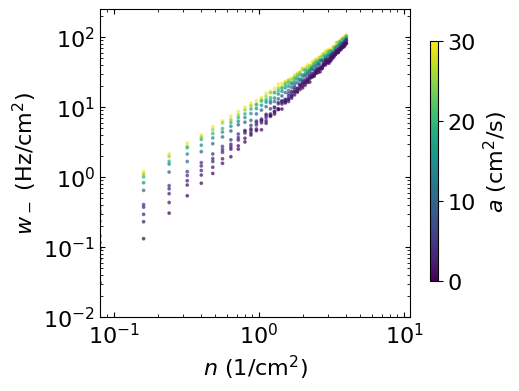

In [23]:
cmap = 'viridis'
c_col = 'rmse_full'
fontsize=16
xytext = (0.09, 10)
x2lim = [1e-2, 25]
x1lim = [8e-3, 1.1]  
# x2lim = [1e-2, 250]
# x1lim = [8e-3, 10.1]  
figsize = (4, 4)  
fig, ax = plt.subplots(figsize=figsize)
varkappa_lst = list(reversed([1, 2, 3, 4,
 5, 10, 15, 20, 25, 30]))
vmin = 0
vmax = 30
x_values = np.logspace(-3, .4, 1000)
for varkappa in varkappa_lst:
    #extract the data
    boo = alinear_values==varkappa
    df_rates = df_rates_lst[int(np.argwhere(boo))]
    assert boo.any()    
    x=df_rates['q'].values
    y=df_rates['w'].values
#     bo = (x<=1)&(x>0.1)
    bo = (x<=10)&(x>0.2)
    dict_fit = print_fit_power_law(x[bo],y[bo],printing=False)
    M = dict_fit['M']
    nu= dict_fit['m']
    y_values = M * x_values**nu
    
    x_values=df_rates['q'].values
    y_values=df_rates['w'].values
    
    c_values = varkappa + 0. * x_values
    #plot
    ax.scatter(x_values,
               y_values,
               c=c_values,
               cmap=cmap,
               alpha=0.6,
               s=3,
               vmin=vmin,
               vmax=vmax)
#     ax.plot(x_values,
#                y_values,c=c_values[0],
#                cmap=cmap,
#                alpha=0.6,
# #                s=3,
#                vmin=vmin,
#                vmax=vmax)

# # #annotate the auxiliary trial that could have taken more than twenty hours on the open science grid   
# # #heretim
# M=3.1
# nu=4/3#2.8
# yhat_values=M*x_values**nu
# ax.scatter(x_values,
#            yhat_values,
#            c=[0]*x_values.shape[0], # pure diffusion
#            cmap=cmap,
#            alpha=0.6,
#            s=3,
#            vmin=vmin,
#            vmax=vmax)
  
FormatAxes(
    ax,
    x1lim=x1lim,
    x2lim=x2lim,
    x1label=r'$n$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
    x2label=r'$w_-$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
    title=None,
    fontsize=fontsize,
    use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
cmap_obj = mpl.cm.get_cmap(cmap)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap_obj,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_xlim([0.08, 11])
x2lim=[0.01, 250]
ax.set_ylim(x2lim)
plt.show()

nuu=1.3333 (upper), nul=2.0000 (lower)


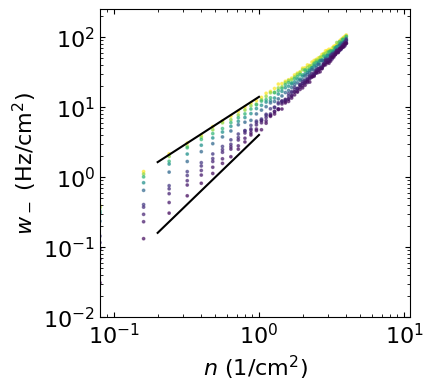

In [34]:
#heretimheretim
#TODO: make ^that with black solid lines for eye guiding powerlaw traces
cmap = 'viridis'
c_col = 'rmse_full'
fontsize=16
xytext = (0.09, 10)
x2lim = [1e-2, 25]
x1lim = [8e-3, 1.1]  
# x2lim = [1e-2, 250]
# x1lim = [8e-3, 10.1]  
figsize = (4, 4)  
fig, ax = plt.subplots(figsize=figsize)
varkappa_lst = list(reversed([1, 2, 3, 4,
 5, 10, 15, 20, 25, 30]))
vmin = 0
vmax = 30
x_values = np.logspace(-3, .4, 1000)
for varkappa in varkappa_lst:
    #extract the data
    boo = alinear_values==varkappa
    df_rates = df_rates_lst[int(np.argwhere(boo))]
    assert boo.any()    
    x=df_rates['q'].values
    y=df_rates['w'].values
#     bo = (x<=1)&(x>0.1)
    bo = (x<=10)&(x>0.2)
    dict_fit = print_fit_power_law(x[bo],y[bo],printing=False)
    M = dict_fit['M']
    nu= dict_fit['m']
    y_values = M * x_values**nu
    
    x_values=df_rates['q'].values
    y_values=df_rates['w'].values
    
    c_values = varkappa + 0. * x_values
    #plot
    ax.scatter(x_values,
               y_values,
               c=c_values,
               cmap=cmap,
               alpha=0.6,
               s=3,
               vmin=vmin,
               vmax=vmax)
#     ax.plot(x_values,
#                y_values,c=c_values[0],
#                cmap=cmap,
#                alpha=0.6,
# #                s=3,
#                vmin=vmin,
#                vmax=vmax)

# # #annotate the auxiliary trial that could have taken more than twenty hours on the open science grid   
# # #heretim
# M=3.1
# nu=4/3#2.8
# yhat_values=M*x_values**nu
# ax.scatter(x_values,
#            yhat_values,
#            c=[0]*x_values.shape[0], # pure diffusion
#            cmap=cmap,
#            alpha=0.6,
#            s=3,
#            vmin=vmin,
#            vmax=vmax)
  
FormatAxes(
    ax,
    x1lim=x1lim,
    x2lim=x2lim,
    x1label=r'$n$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
    x2label=r'$w_-$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
    title=None,
    fontsize=fontsize,
    use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
# cmap_obj = mpl.cm.get_cmap(cmap)
# cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
# cb = mpl.colorbar.ColorbarBase(cax,
#                                cmap=cmap_obj,
#                                norm=norm,
#                                spacing='proportional')
# cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
# cb.ax.tick_params(labelsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
# ax.tick_params(top=False, right=False,direction='in',which='both')
# ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim([0.08, 11])
x2lim=[0.01, 250]
ax.set_ylim(x2lim)

#TODO: plot the lower exponential
n1=0.2
n2=1.0
Mu=14;nuu=4/3
ax.plot([n1,n2],[Mu*(n1)**nuu,Mu*(n2)**nuu],'k-')
Ml=4;nul=2
ax.plot([n1,n2],[Ml*(n1)**nul,Ml*(n2)**nul],'k-')
print(f"{nuu=:.4f} (upper), {nul=:.4f} (lower)")

plt.show()

In [35]:
beep(4)

-n 
-n 
-n 
-n 


0

In [104]:
# Bspline

# compute the power law fits versus alinear

In [105]:
xmax=10;xmin=0.2

In [106]:
df_rates_lst=list(df_rates_lst_fk)
# df_rates_lst=list(df_rates_lst_lr)
#TODO: compute df_death_rate_versus_alinear
dict_fit_lst=[]
for varkappa in alinear_values:
    #extract the data
    boo = alinear_values==varkappa
    df_rates = df_rates_lst[int(np.argwhere(boo))]
    assert boo.any()    
    x=df_rates['q'].values
    y=df_rates['w'].values
    bo = (x<=xmax)&(x>xmin)
    dict_fit = print_fit_power_law(x[bo],y[bo],printing=False)
    dict_fit['alinear']=varkappa
    #record
    dict_fit_lst.append(dict_fit)
df_death_rate_versus_alinear=pd.DataFrame(dict_fit_lst)
dict_data_fk=dict()
dict_data_fk['df_death_rate_versus_alinear']=df_death_rate_versus_alinear
# dict_data_lr['df_death_rate_versus_alinear']=df_death_rate_versus_alinear

In [107]:
#compute df_death_rate_versus_alinear
df_rates_lst=list(df_rates_lst_lr)
dict_fit_lst=[]
for varkappa in alinear_values:
    #extract the data
    boo = alinear_values==varkappa
    df_rates = df_rates_lst[int(np.argwhere(boo))]
    assert boo.any()    
    x=df_rates['q'].values
    y=df_rates['w'].values
    bo = (x<=xmax)&(x>xmin)
    dict_fit = print_fit_power_law(x[bo],y[bo],printing=False)
    dict_fit['alinear']=varkappa
    #record
    dict_fit_lst.append(dict_fit)
df_death_rate_versus_alinear=pd.DataFrame(dict_fit_lst)
dict_data_lr=dict()
dict_data_lr['df_death_rate_versus_alinear']=df_death_rate_versus_alinear

In [108]:
7/5,4/3,13/10

(1.4, 1.3333333333333333, 1.3)

In [109]:
# TODO: plot the power law fits versus alinear

In [110]:
#extrct xy vlues
alinear_fk = 1.552
alinear_lr = 9.3
dfdr = dict_data_fk['df_death_rate_versus_alinear']
alinear_vlues1 = dfdr[dfdr['alinear']!=alinear_fk]['alinear'].values
num_vlues1 = dfdr[dfdr['alinear']!=alinear_fk]['m'].values
Mm_vlues1 = dfdr[dfdr['alinear']!=alinear_fk]['M'].values
num_fk = dfdr[dfdr['alinear']==alinear_fk]['m'].values
Mm_fk = dfdr[dfdr['alinear']==alinear_fk]['M'].values

dfdr = dict_data_lr['df_death_rate_versus_alinear']
alinear_vlues2 = dfdr[dfdr['alinear']!=alinear_lr]['alinear'].values
num_vlues2 = dfdr[dfdr['alinear']!=alinear_lr]['m'].values
Mm_vlues2 = dfdr[dfdr['alinear']!=alinear_lr]['M'].values
num_lr = dfdr[dfdr['alinear']==alinear_lr]['m'].values
Mm_lr = dfdr[dfdr['alinear']==alinear_lr]['M'].values
num_lr

array([1.65665929])

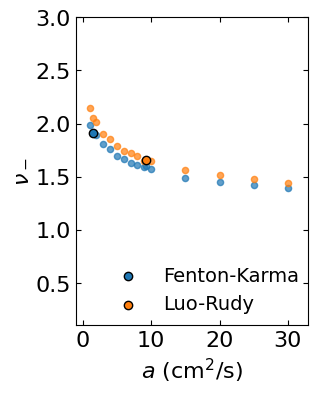

In [111]:
#plot the panel
cmap = 'viridis'
num_points = 25
c_col = 'rmse_full'
# fontsize = 20
fontsize=16
figsize = (3, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)
#plot xy values for full models
dict_data_fk['df_death_rate_versus_alinear'].plot.scatter(x='alinear',y='m',ax=ax,c='C0',alpha=0.7)#,label='Fenton-Karma')
dict_data_lr['df_death_rate_versus_alinear'].plot.scatter(x='alinear',y='m',ax=ax,c='C1',alpha=0.7)#,label='Luo-Rudy')

ax.scatter([alinear_fk],[num_fk],marker='o',edgecolor='k',c='C0',#'k',
           alpha=1,label='Fenton-Karma')
ax.scatter([alinear_lr],[num_lr],marker='o',edgecolor='k',c='C1',#c='k',
           alpha=1,label='Luo-Rudy')

#plot dotted line at 4/3
# xv=np.linspace(0,120,10)
# ax.plot(xv,0.*xv+4/3,':',color='gray')#,'k--',lw=2)
#format plot
format_plot(ax=ax,xlabel=r'$a$ (cm$^2$/s)',ylabel=r'$\nu_-$',use_loglog=False,fontsize=fontsize)
# ax.set_xticks([0,25,50,75,100])
ax.set_xticks([0,10,20,30])
ax.set_xlim([-1,33])
ax.tick_params(top=True, right=True,direction='in',which='both')

# AddLegend(ax=ax,xy=(0.1,0.990),fontsize=fontsize-3)
# leg = AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
leg = AddLegend(ax=ax,xy=(0.065,0.25),fontsize=fontsize-2)
ax.set_ylim([0.1,3])
plt.show()

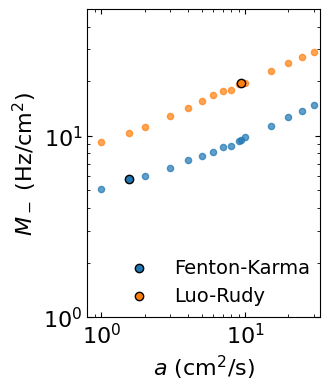

In [120]:
#plot the panel
cmap = 'viridis'
num_points = 25
c_col = 'rmse_full'
# fontsize = 20
fontsize=16
figsize = (3, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)
#plot xy values for full models
dict_data_fk['df_death_rate_versus_alinear'].plot.scatter(x='alinear',y='M',ax=ax,c='C0',alpha=0.7)#,label='Fenton-Karma')
dict_data_lr['df_death_rate_versus_alinear'].plot.scatter(x='alinear',y='M',ax=ax,c='C1',alpha=0.7)#,label='Luo-Rudy')

ax.scatter([alinear_fk],[Mm_fk],marker='o',edgecolor='k',c='C0',#'k',
           alpha=1,label='Fenton-Karma')
ax.scatter([alinear_lr],[Mm_lr],marker='o',edgecolor='k',c='C1',#c='k',
           alpha=1,label='Luo-Rudy')


#format plot
format_plot(ax=ax,xlabel=r'$a$ (cm$^2$/s)',ylabel=r'$M_-$ (Hz/cm$^2)$',use_loglog=False,fontsize=fontsize)
# ax.set_xticks([0,25,50,75,100])
# ax.set_xticks([0,10,20,30])
ax.set_xlim([0.8,33])
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_xscale('log')
ax.set_yscale('log')
# AddLegend(ax=ax,xy=(0.1,0.990),fontsize=fontsize-3)
# leg = AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
leg = AddLegend(ax=ax,xy=(0.065,0.25),fontsize=fontsize-2)
ax.set_ylim([1,50])

#####################
# plot the legend
#####################
#get 2 token points for either of the full models
#LR
num = 1/3 # 1.638 # ±0.017
# xlst=[0.14,0.8]
xlst=[1e1,1e2]
y1 =10
# y1 = 8
y2 = y1 * (xlst[1]/xlst[0])**num
ylst=[y1,y2]
xlst_lr = list(xlst)
ylst_lr = list(ylst)

#FK
num = 1/3 # 1.88 # ±0.03
# xlst=[1.4,8]
# xlst=[7.,1e3]
y1 = 19
# y1 = 15
y2 = y1 * (xlst[1]/xlst[0])**num
ylst=[y1,y2]
xlst_fk = list(xlst)
ylst_fk = list(ylst)


# #mark the slope corresponding to the FK model
# ax.plot(xlst_fk,ylst_fk,':',color='gray')
# #mark the slope corresponding to the LR model
# ax.plot(xlst_lr,ylst_lr,':',color='gray')
#DONT(in .odg): annotate slope marker as $nu_-$
plt.show()

# recall birth rates

In [121]:
birth_rate_dir_fk = f'{nb_dir}/data/full_results/data_fig4_timothy_fk_up2_rescaled_per_tt.csv'
birth_rate_dir_lr = f'{nb_dir}/data/full_results/data_fig4_timothy_lr_up2_rescaled_per_tt.csv'
df_birth_fk = pd.read_csv(birth_rate_dir_fk)
df_birth_lr = pd.read_csv(birth_rate_dir_lr)
#scale from kHz to Hz
df_birth_fk['w']*=1e3
df_birth_lr['w']*=1e3

In [122]:
# DONE: compute powerlaw fits of birth rates wjr
print(f"creation rate density powerlaw fits:")
dict_fit_birth_fk = print_fit_power_law(x=df_birth_fk['q'].values,y=df_birth_fk['w'].values)
dict_fit_birth_lr = print_fit_power_law(x=df_birth_lr['q'].values,y=df_birth_lr['w'].values)

# wjr=recall_powerlaw_fits_to_full_models()
# print(f"\nannihilation rate density powerlaw fits:")
# print(f"wjr['fk_pbc']:")
# print_dict(wjr['fk_pbc'])
# print(f"\nwjr['lr_pbc']:")
# print_dict(wjr['lr_pbc'])

# print(f"\nwjr['fk_pbc']:")
# print_dict(wjr['fk_pbc'])
# print(f"\nwjr['lr_pbc']:")
# print_dict(wjr['lr_pbc'])

creation rate density powerlaw fits:
m = 0.229594 +/- 0.010098
M = 0.864210 +/- 0.002349 Hz/cm^2; B=0.529597 +/- 0.020570
RMSE=0.0215 Hz/cm^2; R^2=0.9655; MPE=3.0209%; N=73
m = 0.714755 +/- 0.009768
M = 3.277073 +/- 0.102643 Hz/cm^2; B=5.262676 +/- 0.107278
RMSE=0.0417 Hz/cm^2; R^2=0.9971; MPE=4.2323%; N=62


In [123]:
xv = np.arange(0.1, 10,0.01)
# evaluate powerlaw fits of birth rates wjr
yv_birth_lr = dict_fit_birth_lr['M']*xv**dict_fit_birth_lr['m']
# yv_death_lr = wjr['lr_pbc']['M']*xv**wjr['lr_pbc']['m']
# evalutate plot powerlaw fits of death rates wjr
yv_birth_fk = dict_fit_birth_fk['M']*xv**dict_fit_birth_fk['m']
# yv_death_fk = wjr['fk_pbc']['M']*xv**wjr['fk_pbc']['m']
# yv_birth_lr.shape,yv_birth_fk.shape
# x2lim

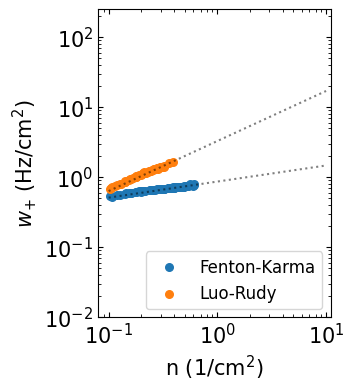

In [124]:
# fig,ax=plt.subplots()
# figsize = (6, 4)  #(5,4)
# figsize = (4,4)
figsize = (3,4)
# fontsize=16
fig,ax=plt.subplots(figsize=figsize)
fontsize=15
# x1lim=[0.008, 11]
# x1lim=[0.08, 11]
# x2lim=[0.01, 25]
# x2lim=[0.01, 250]
legend_alpha=1.0
minx=0.1
alpha=0.2
s=40
# fontsize=18
use_loglog=True
frameon_legend=False
show_fk=True
show_lr=True
zorder=0
# df_birth_fk.plot(x='q',y='w',ax=ax,c='C0',alpha=0.5,label=r'FK: N$\rightarrow$N+2',lw=4)
# fk.plot(x='q',y='w',ax=ax,c='C0',label=r'FK: N$\rightarrow$N-2',lw=4)
# df_birth_lr.plot(x='q',y='w',ax=ax,c='C1',alpha=0.5,label=r'LR: N$\rightarrow$N+2',lw=4)
# lr.plot(x='q',y='w',ax=ax,c='C1',label=r'LR: N$\rightarrow$N-2',lw=4)
markersize=30

# df_birth_fk.plot.scatter(x='q',y='w',ax=ax,c='C0',#'gray',#
df_birth_fk[df_birth_fk['q']>minx].plot.scatter(x='q',y='w',ax=ax,c='C0',#'gray',#
#                          marker='^',label=r'FK: N$\rightarrow$N+2',
                         label=r'Fenton-Karma',
                         alpha=1.,s=markersize)
# fk.plot.scatter(x='q',y='w',ax=ax,c='C0',label=r'FK: N$\rightarrow$N-2',s=markersize)
# df_birth_lr.plot.scatter(x='q',y='w',ax=ax,c='C1',#'r',#
df_birth_lr[df_birth_lr['q']>minx].plot.scatter(x='q',y='w',ax=ax,c='C1',#'r',#
#                         marker='^',label=r'LR: N$\rightarrow$N+2',
                         label=r'Luo-Rudy',
                         alpha=1.,s=markersize)
# lr.plot.scatter(x='q',y='w',ax=ax,c='C1',label=r'LR: N$\rightarrow$N-2',s=markersize)

#plot the powerlaw fits
# ax.plot(xv,yv_death_fk,'k--',alpha=0.5)
# ax.plot(xv,yv_death_lr,'k--',alpha=0.5)
# ax.plot(xv,yv_birth_fk,'k--',alpha=0.5)
# ax.plot(xv,yv_birth_lr,'k--',alpha=0.5)
# ax.plot(xv,yv_birth_fk,'C0--',alpha=0.5)
# ax.plot(xv,yv_birth_lr,'C1--',alpha=0.5)
ax.plot(xv,yv_birth_fk,'k:',alpha=0.5)
ax.plot(xv,yv_birth_lr,'k:',alpha=0.5)

# #draw vertical dotted line up to the intersection point for both of the full models
# ax.scatter([qstar_fk],[wstar_fk],c='k',s=40,alpha=0.9,zorder=100)
# ax.scatter([qstar_lr],[wstar_lr],c='k',s=40,alpha=0.9,zorder=100)
# ax.plot([qstar_fk,qstar_fk],[0.001,wstar_fk],'k:',alpha=0.9)
# ax.plot([qstar_lr,qstar_lr],[0.001,wstar_lr],'k:',alpha=0.9)

ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'$n$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# format_plot(ax=ax,xlabel=r'$q$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# ax.legend(loc='upper left',fontsize=fontsize-2)
# ax.legend(loc='lower right',fontsize=fontsize-2.,frameon=False,ncol=2)
# leg = ax.legend(loc=(1.04,0.2),fontsize=fontsize-2.,frameon=False)
leg = ax.legend(loc='upper left',fontsize=fontsize-3.,frameon=False,ncol=1)
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

    
    
# format_plot
format_plot(ax=ax,xlabel=r'n (1/cm$^2$)',ylabel=r'$w_{+}$ (Hz/cm$^2$)',fontsize=fontsize)#,use_loglog=True)
# format_plot(ax=ax,xlabel=r'n (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)#,use_loglog=True)
# format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)#,use_loglog=True)
# # plt.legend(fontsize=14,frameon=False,loc='upper left')
# plt.legend(fontsize=14,frameon=False,loc='upper left')
# # ax.get_legend().remove()


leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=True,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.get_legend().remove()

# AddLegend(loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim((0.0023641776732192935, 25.08908114695242))
ax.tick_params(top=True, right=True,direction='in',which='both')
# ax.set_xlim((0.008, 11.0))
# ax.set_ylim((0.01, 250.0))
# ax.set_xlim(x1lim)
# ax.set_xlim([0.08, 1.1])
ax.set_xlim([0.08, 11])
x2lim=[0.01, 250]
ax.set_ylim(x2lim)
plt.show()

# estimate the mean termination time versus alinear

In [125]:
amax=9999
# num_iter=20 # max num particles to consider divided by two.
num_iter=50 # max num particles to consider divided by two.

In [126]:
# df_death_rate_versus_alinear = dict_data_fk['df_death_rate_versus_alinear']
df_death_rate_versus_alinear = dict_data_lr['df_death_rate_versus_alinear']

model_name='Luo-Rudy'
Mp = dict_fit_birth_lr['M']
nup = dict_fit_birth_lr['m']
Mm = dict_fit_death_lr['M']
num = dict_fit_death_lr['m']

In [127]:
#format data for extraction
# input size of computational domain with pbc
# L=5 #cm
A=L**2 #cm^2
# alinear_lst = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0]
# alinear_lst = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1]
alinear_lst = list(df_death_rate_versus_alinear.alinear.drop_duplicates().values)
printing=True
dict_results_master_lst=[]
for alinear in alinear_lst:
    dg = df_death_rate_versus_alinear [ df_death_rate_versus_alinear['alinear'] == alinear ]
    num = float(dg['m'])
    Delta_num = float(dg['Delta_m'])
    Mm = float(dg['M'])
    Delta_Mm = float(dg['Delta_M'])
    ################################
    # estimate mtt 
    ################################
    #implement model
    comp_Wp = get_comp_W(A,nup,Mp)
    comp_Wm = get_comp_W(A,num,Mm)
    phi = get_phi(comp_Wm,comp_Wp)
    eval_tau= get_eval_tau(eval_tau_expression)
    #estimate the quasistatic distribution
    n_qs,prob_qs = comp_quasistatic_distrib_paired_bdrates(comp_Wm,comp_Wp,num_iter=num_iter)
    #estimate the mean termination time
    tau = eval_tau(n_qs, prob_qs, phi, comp_Wm, comp_Wp, maxinf_num_inner_sum=num_iter, printing=False)#,**kwargs)
    
    #not used elsewhere
    # tscale=1e-3
    # tau*=tscale
    
    #estimate the mean number of particles
    nbar = np.sum(prob_qs*n_qs)
    nsqbar = np.sum(prob_qs*(n_qs**2))
    xv = np.arange(0.02, 1,0.001)
    qstar,wstar = comp_powerlaw_intersection(Mp,nup,Mm,num,xv=xv)
    #record
    dict_results_master_ = dict(
        model=model_name,
        alinear=alinear,
        tau=tau,
        nbar=nbar,
        qstarA=qstar*A,
        A=A,
        Mp=Mp,nup=nup,
        Mm=Mm,num=num,
        qstar=qstar,wstar=wstar,
        num_iter=num_iter,
        nsqbar=nsqbar)
    #print summary
    if printing:
        print(f"{model_name} ({A=:.0f} cm^2) with {alinear=:.4f} cm^2/s:")
        print(f"- mean termination time (correct qs distr): {tau:.4f} s")    
        print(f"- mean num particles (correct qs distr): {nbar:.4f}")
        print(f"- mean num particles (qstar*A): {qstar*A:.4f}") 
    #record
    dict_results_master_lst.append(dict_results_master_)

df_results_master = pd.DataFrame(dict_results_master_lst)
df_results_master_lr=df_results_master.copy()

#extract xy
df_results_master.sort_values(by='alinear',inplace=True)
boo = (df_results_master['alinear']<=amax)&(df_results_master['alinear']>0)
xlr=df_results_master['alinear'].values[boo]
ylr=df_results_master['tau'].values[boo]

Luo-Rudy (A=25 cm^2) with alinear=1.5520 cm^2/s:
- mean termination time (correct qs distr): 16.5377 s
- mean num particles (correct qs distr): 9.3108
- mean num particles (qstar*A): 10.6000
Luo-Rudy (A=25 cm^2) with alinear=9.3000 cm^2/s:
- mean termination time (correct qs distr): 0.3535 s
- mean num particles (correct qs distr): 8.0145
- mean num particles (qstar*A): 3.7500
Luo-Rudy (A=25 cm^2) with alinear=1.0000 cm^2/s:
- mean termination time (correct qs distr): 56.0608 s
- mean num particles (correct qs distr): 10.6970
- mean num particles (qstar*A): 12.1000
Luo-Rudy (A=25 cm^2) with alinear=2.0000 cm^2/s:
- mean termination time (correct qs distr): 8.9808 s
- mean num particles (correct qs distr): 8.5549
- mean num particles (qstar*A): 9.6750
Luo-Rudy (A=25 cm^2) with alinear=3.0000 cm^2/s:
- mean termination time (correct qs distr): 2.7494 s
- mean num particles (correct qs distr): 7.5071
- mean num particles (qstar*A): 7.8250
Luo-Rudy (A=25 cm^2) with alinear=4.0000 cm^2/s:
-

In [128]:
df_death_rate_versus_alinear = dict_data_fk['df_death_rate_versus_alinear']
# df_death_rate_versus_alinear = dict_data_lr['df_death_rate_versus_alinear']

model_name='Fenton-Karma'
Mp = dict_fit_birth_fk['M']
nup = dict_fit_birth_fk['m']
Mm = dict_fit_death_fk['M']
num = dict_fit_death_fk['m']

In [129]:
#format data for extraction
# input size of computational domain with pbc
# L=5 #cm
A=L**2 #cm^2
# num_iter=20 # max num particles to consider divided by two.
# alinear_lst = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0]
# alinear_lst = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1]
alinear_lst = list(df_death_rate_versus_alinear.alinear.drop_duplicates().values)
printing=True
dict_results_master_lst=[]
for alinear in alinear_lst:
    dg = df_death_rate_versus_alinear [ df_death_rate_versus_alinear['alinear'] == alinear ]
    num = float(dg['m'])
    Delta_num = float(dg['Delta_m'])
    Mm = float(dg['M'])
    Delta_Mm = float(dg['Delta_M'])
    ################################
    # estimate mtt 
    ################################
    #implement model
    comp_Wp = get_comp_W(A,nup,Mp)
    comp_Wm = get_comp_W(A,num,Mm)
    phi = get_phi(comp_Wm,comp_Wp)
    eval_tau= get_eval_tau(eval_tau_expression)
    #estimate the quasistatic distribution
    n_qs,prob_qs = comp_quasistatic_distrib_paired_bdrates(comp_Wm,comp_Wp,num_iter=num_iter)
    #estimate the mean termination time
    tau = eval_tau(n_qs, prob_qs, phi, comp_Wm, comp_Wp, maxinf_num_inner_sum=num_iter, printing=False)#,**kwargs)
    
    #not used elsewhere
    # tscale=1e-3
    # tau*=tscale
    
    #estimate the mean number of particles
    nbar = np.sum(prob_qs*n_qs)
    nsqbar = np.sum(prob_qs*(n_qs**2))
    xv = np.arange(0.02, 1,0.001)
    qstar,wstar = comp_powerlaw_intersection(Mp,nup,Mm,num,xv=xv)
    #record
    dict_results_master_ = dict(
        model=model_name,
        alinear=alinear,
        tau=tau,
        nbar=nbar,
        qstarA=qstar*A,
        A=A,
        Mp=Mp,nup=nup,
        Mm=Mm,num=num,
        qstar=qstar,wstar=wstar,
        num_iter=num_iter,
        nsqbar=nsqbar)
    #print summary
    if printing:
        print(f"{model_name} ({A=:.0f} cm^2) with {alinear=:.4f} cm^2/s:")
        print(f"- mean termination time (correct qs distr): {tau:.4f} s")    
        print(f"- mean num particles (correct qs distr): {nbar:.4f}")
        print(f"- mean num particles (qstar*A): {qstar*A:.4f}") 
    #record
    dict_results_master_lst.append(dict_results_master_)

df_results_master = pd.DataFrame(dict_results_master_lst)
df_results_master_fk=df_results_master.copy()
#extract xy
df_results_master.sort_values(by='alinear',inplace=True)
boo = (df_results_master['alinear']<=amax)&(df_results_master['alinear']>0)
xfk=df_results_master['alinear'].values[boo]
yfk=df_results_master['tau'].values[boo]

Fenton-Karma (A=25 cm^2) with alinear=1.5520 cm^2/s:
- mean termination time (correct qs distr): 16.5380 s
- mean num particles (correct qs distr): 7.7487
- mean num particles (qstar*A): 8.1250
Fenton-Karma (A=25 cm^2) with alinear=9.3000 cm^2/s:
- mean termination time (correct qs distr): 0.8502 s
- mean num particles (correct qs distr): 7.7756
- mean num particles (qstar*A): 4.3500
Fenton-Karma (A=25 cm^2) with alinear=1.0000 cm^2/s:
- mean termination time (correct qs distr): 42.8950 s
- mean num particles (correct qs distr): 8.5386
- mean num particles (qstar*A): 9.1250
Fenton-Karma (A=25 cm^2) with alinear=2.0000 cm^2/s:
- mean termination time (correct qs distr): 12.5782 s
- mean num particles (correct qs distr): 7.5404
- mean num particles (qstar*A): 7.8000
Fenton-Karma (A=25 cm^2) with alinear=3.0000 cm^2/s:
- mean termination time (correct qs distr): 5.4432 s
- mean num particles (correct qs distr): 7.1157
- mean num particles (qstar*A): 6.8500
Fenton-Karma (A=25 cm^2) with al

In [130]:
aline_fk = 1.552
aline_lr = 9.3
tau_fk = yfk[xfk==aline_fk][0]
tau_lr = ylr[xlr==aline_lr][0]
L

5

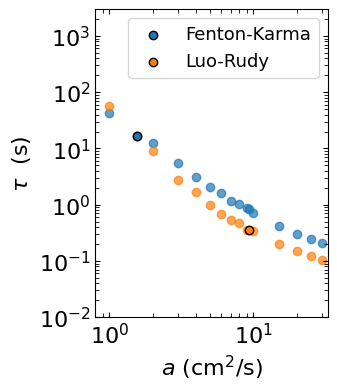

In [131]:
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
# ax.scatter(x=x,
#            y=y+tauinfty,#**0.5,#**2,#
#            c='k')
ax.scatter(xfk,yfk,c='C0',alpha=alpha)#,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha)#,label='Luo-Rudy')
ax.scatter([aline_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
           alpha=1,label='Fenton-Karma')
ax.scatter([aline_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
           alpha=1,label='Luo-Rudy')
format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
ax.set_ylim([1e-2,3000])
ax.set_xlim([0.8,33])
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,frameon=False,ncol=1)
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

In [132]:
df_results_master_fk['model_name']='FK'
df_results_master_lr['model_name']='LR'
df_taubariN = pd.concat([
    df_results_master_fk,
    df_results_master_lr
])

In [133]:
df_taubariN['Nbar']=df_taubariN['nbar'] #not monotonic
df_taubariN['Nbar']=df_taubariN['qstarA']
df_taubariN.head()

,model,alinear,tau,nbar,qstarA,A,Mp,nup,Mm,num,qstar,wstar,num_iter,nsqbar,model_name,Nbar
0,Fenton-Karma,1.552,16.538043,7.748724,8.125,25,0.86421,0.229594,5.750859,1.914978,0.325,0.667653,50,78.156923,FK,8.125
1,Fenton-Karma,9.300,0.850184,7.775626,4.350,25,0.86421,0.229594,9.503660,1.600492,0.174,0.578434,50,181.767453,FK,4.350
2,Fenton-Karma,1.000,42.895003,8.538621,9.125,25,0.86421,0.229594,5.088722,1.989895,0.365,0.685685,50,86.639556,FK,9.125
3,Fenton-Karma,2.000,12.578223,7.540391,7.800,25,0.86421,0.229594,5.992586,1.893906,0.312,0.661425,50,77.207680,FK,7.800
4,Fenton-Karma,3.000,5.443185,7.115713,6.850,25,0.86421,0.229594,6.637204,1.805052,0.274,0.641993,50,84.091063,FK,6.850


In [134]:
beep(4)

-n 
-n 
-n 
-n 


0

In [135]:
# taubarian_dir = os.path.join(nb_dir,'data/lpm_results/taubar_vs_alinear_at_A_25.csv')
# df_taubariN = pd.read_csv(taubarian_dir, skipinitialspace = True) 
# df_taubariN

In [136]:
A = 25
ycol='Nbar'
# ycol='Nbar_soln' # << 'taubar'
# ycol='taubar'  # << not 'taubar'
xfk = df_taubariN[df_taubariN['model_name']=='FK']['alinear'].values
yfk = df_taubariN[df_taubariN['model_name']=='FK'][ycol].values#/A
xlr = df_taubariN[df_taubariN['model_name']=='LR']['alinear'].values
ylr = df_taubariN[df_taubariN['model_name']=='LR'][ycol].values#/A


aline_fk = 1.552
aline_lr = 9.3
N_fk = yfk[xfk==aline_fk][0]
N_lr = ylr[xlr==aline_lr][0]

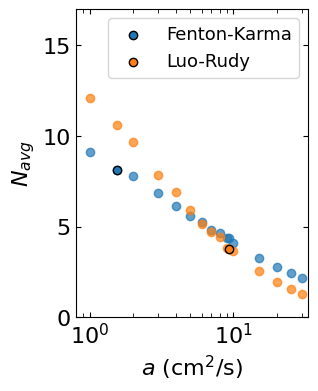

In [137]:
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
ax.scatter(xfk,yfk,c='C0',alpha=alpha)#,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha)#,label='Luo-Rudy')
ax.scatter([aline_fk],[N_fk],marker='o',edgecolor='k',c='C0',alpha=1,label='Fenton-Karma')
ax.scatter([aline_lr],[N_lr],marker='o',edgecolor='k',c='C1',alpha=1,label='Luo-Rudy')
format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$N_{avg}$',fontsize=16)
# ax.scatter(xfk,yfk/A,c='C0',alpha=alpha)#,label='Fenton-Karma')
# ax.scatter(xlr,ylr/A,c='C1',alpha=alpha)#,label='Luo-Rudy')
# ax.scatter([aline_fk],[N_fk/A],marker='o',edgecolor='k',c='C0',alpha=1,label='Fenton-Karma')
# ax.scatter([aline_lr],[N_lr/A],marker='o',edgecolor='k',c='C1',alpha=1,label='Luo-Rudy')
# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$n_{avg}$  (cm$^{-2}$)',fontsize=16)
ax.set_xscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
ax.set_ylim([0,17])
ax.set_xlim([0.8,33])
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,frameon=False,ncol=1)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

- Q: What was the difference between Nbar and Nbar_soln.  Which equals nbar?
- A: one A*qstar while the other was computed in a more complicated way.
- NOTE: A*qstar should be monotonic

for more figures with A on the x-axis, see http://localhost:8890/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb

# generate plot showing termination time probability density

In [138]:
df_results_master = df_results_master_fk.copy()

alinear=5.0000 cm^2/s yieled tau=2.0412 s
alinear=4.0000 cm^2/s yieled tau=3.1736 s
alinear=3.0000 cm^2/s yieled tau=5.4432 s
alinear=2.0000 cm^2/s yieled tau=12.5782 s
alinear=1.0000 cm^2/s yieled tau=42.8950 s


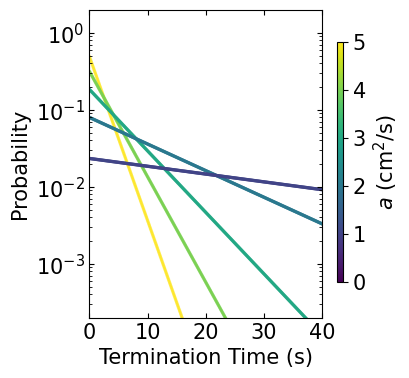

In [139]:
#DONE: plot predicted prob. of term from master eqns instead of the pdf of the gamma fit.
fontsize=15
alpha=0.9
cmap='viridis'
figsize=(3,4)
# xlim=[0,250]
# xlim=[0,100]
# xlim=[0,20]
xlim=[0,40]

# df_results_master

x_values = np.arange(0,41,0.1) #s.
alpha=0.7
alinear_lst_selected = [5, 4, 3, 2, 1]
# alinear_lst_selected = [30, 25, 20, 15, 10, 5, 4, 3, ]
# alinear_lst_selected = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1]
# alinear_lst_selected = [30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0]

vmin=0
vmax=np.max(alinear_lst_selected)

fig,ax=plt.subplots(figsize=figsize)

# for alinear in alinear_lst:
for alinear in alinear_lst_selected:
    dg = df_results_master[df_results_master['alinear']==alinear]
    tau = float(dg['tau'])
    print(f"{alinear=:.4f} cm^2/s yieled {tau=:.4f} s")

    beta = 1/tau
    prob_t_term = beta*np.exp(-beta*x_values) 
    #plot line plot traces
    ax.scatter(x_values, prob_t_term, c=alinear+0.*x_values,s=2, alpha=alpha, label='_Master Fit',cmap=cmap,vmin=vmin,vmax=vmax)

#format_plot
format_plot(ax=ax,xlabel='Termination Time (s)',ylabel='Probability',fontsize=fontsize)#,use_loglog=True)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim((0.0002, 2.0))
ax.set_xlim(xlim)
ax.set_xticks([0,10,20,30,40])
# ax.set_ylim((2e-4, 2))
ax.tick_params(top=True, right=True,direction='in',which='both')

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
cmap_obj = mpl.cm.get_cmap(cmap)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap_obj,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

# cax = fig.add_axes([0.17, 0.82, 0.7, 0.02])
# cb = mpl.colorbar.ColorbarBase(cax,
#                                cmap=cmap_obj,
#                                norm=norm,
#                                spacing='proportional',
#                                orientation='horizontal',#'vertical',
#                                ticks=[1,2,3,4,5],
#                               )
# cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize-3)
# cb.ax.tick_params(labelsize=fontsize-3)

ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_xlim([0,40])
plt.show()